In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
import librosa
import librosa.display
from torch.utils.data import sampler
import torch.optim as optim
import json
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from torchinfo import summary
from tqdm import tqdm
import os

In [11]:
def getID(filename):
    file=filename.split('.')[0]
    id=file.split('_')[-1]
    return id

In [12]:
def measure_ERLE_old(out,nend):
    nfft_len=1023
    stft_out=librosa.stft(out,n_fft=nfft_len, hop_length=nfft_len//4,center=True) 
    stft_nend=librosa.stft(nend,n_fft=nfft_len, hop_length=nfft_len//4,center=True)
    (m,n)=stft_out.shape
    for i in range(0,n):
        E=stft_out[:,i]*stft_out[:,i]
        D=stft_nend[:,i]*stft_nend[:,i]

    return 


def measure_ERLE(out,mic):
    m=np.linalg.norm(mic)
    e=np.linalg.norm(out)
    erle=20*np.log10(m/e)
    return erle

def measure_SDR(out,nend):
    shat=out-nend
    s=np.linalg.norm(nend)
    e=np.linalg.norm(shat)
    erle=20*np.log10(s/e)
    return erle

In [20]:
dataset_path="../measure_erle"
mean_erle=[]
id_list=[]
for i , (dirpath, dirname, filename) in tqdm(enumerate(os.walk(dataset_path))):
    substr="echo_cancelled"
    for file in filename:
        filepath = os.path.join( dirpath, file)
        if ( (filepath.endswith('.wav')) and (substr in filepath)):
            id=getID(file)
            id_list.append(id)
            out,_=librosa.load("../measure_erle/echo_cancelled_fileid_"+ id +".wav",sr=8000)
            mic,_=librosa.load("../measure_erle/mic_fileid_"+id+".wav", sr=8000)
            nend,_=librosa.load("../measure_erle/nend_fileid_"+id+".wav", sr=8000)
            echo,_=librosa.load("../measure_erle/echo_fileid_"+id+".wav", sr=8000)
            m=len(out)
            mic=mic[:m]
            nend=nend[:m]
            echo=echo[:m]
            erle=measure_ERLE(out,echo)
            mean_erle.append(erle)         
erle=np.mean(mean_erle)
maxerle=np.max(mean_erle)
print("Mean ERLE:",erle)
print("Max ERLE:",maxerle)

1it [00:00, 28.82it/s]

Mean ERLE: 27.258808255265468
Max ERLE: 54.53779697418213


Text(0, 0.5, 'amplitude')

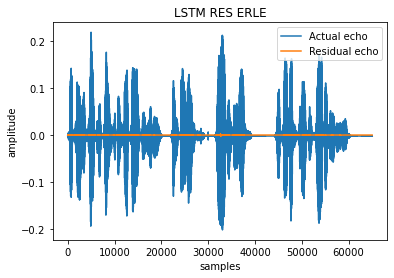

In [22]:
id=str(id_list[np.argmax(mean_erle)])
out,_=librosa.load("../measure_erle/echo_cancelled_fileid_"+ id +".wav",sr=8000)
mic,_=librosa.load("../measure_erle/mic_fileid_"+id+".wav", sr=8000)
nend,_=librosa.load("../measure_erle/nend_fileid_"+id+".wav", sr=8000)
echo,_=librosa.load("../measure_erle/echo_fileid_"+id+".wav", sr=8000)
m=len(out)
mic=mic[:m]
nend=nend[:m]
echo=echo[:m]
plt.figure()
plt.plot(echo)
plt.plot(out)
plt.legend(["Actual echo","Residual echo"])
title="LSTM RES ERLE"
plt.title(title)
plt.xlabel("samples")
plt.ylabel("amplitude")
#plt.savefig("../report_figs/"+title+".png")

In [23]:
dataset_path="../measure_sdr"
mean_erle=[]
id_list=[]
for i , (dirpath, dirname, filename) in tqdm(enumerate(os.walk(dataset_path))):
    substr="echo_cancelled"
    for file in filename:
        filepath = os.path.join( dirpath, file)
        if ( (filepath.endswith('.wav')) and (substr in filepath)):
            id=getID(file)
            id_list.append(id)
            out,_=librosa.load("../measure_sdr/echo_cancelled_fileid_"+ id +".wav",sr=8000)
            mic,_=librosa.load("../measure_sdr/mic_fileid_"+id+".wav", sr=8000)
            nend,_=librosa.load("../measure_sdr/nend_fileid_"+id+".wav", sr=8000)
            echo,_=librosa.load("../measure_sdr/echo_fileid_"+id+".wav", sr=8000)
            res,_=librosa.load("../measure_sdr/res_fileid_"+id+".wav", sr=8000)
            m=len(out)
            mic=mic[:m]
            nend=nend[:m]
            echo=echo[:m]
            erle=measure_SDR(out,nend)
            mean_erle.append(erle)         
sdr=np.mean(mean_erle)
maxsdr=np.max(mean_erle)
print("Mean SDR:",sdr)
print("Max SDR:",maxsdr)


0it [00:00, ?it/s]/home/prasad/anaconda3/envs/aec/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../measure_sdr/res_fileid_7044.wav'

In [24]:
dataset_path="../measure_sdr"
mean_erle=[]
id_list=[]
for i , (dirpath, dirname, filename) in tqdm(enumerate(os.walk(dataset_path))):
    substr="echo_cancelled"
    for file in filename:
        filepath = os.path.join( dirpath, file)
        if ( (filepath.endswith('.wav')) and (substr in filepath)):
            id=getID(file)
            id_list.append(id)
            out,_=librosa.load("../measure_sdr/echo_cancelled_fileid_"+ id +".wav",sr=8000)
            mic,_=librosa.load("../measure_sdr/mic_fileid_"+id+".wav", sr=8000)
            nend,_=librosa.load("../measure_sdr/nend_fileid_"+id+".wav", sr=8000)
            echo,_=librosa.load("../measure_sdr/echo_fileid_"+id+".wav", sr=8000)
            m=len(out)
            mic=mic[:m]
            nend=nend[:m]
            echo=echo[:m]
            erle=measure_SDR(out,nend)
            mean_erle.append(erle)         
sdr=np.mean(mean_erle)
maxsdr=np.max(mean_erle)
print("Mean SDR:",sdr)
print("Max SDR:",maxsdr)


1it [00:00, 14.01it/s]

Mean SDR: 4.7892486894270405
Max SDR: 11.165388822555542


Text(0, 0.5, 'amplitude')

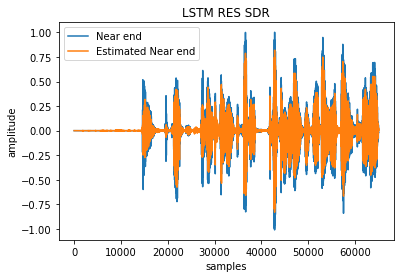

In [25]:
id=str(id_list[np.argmax(mean_erle)])
out,_=librosa.load("../measure_sdr/echo_cancelled_fileid_"+ id +".wav",sr=8000)
mic,_=librosa.load("../measure_sdr/mic_fileid_"+id+".wav", sr=8000)
nend,_=librosa.load("../measure_sdr/nend_fileid_"+id+".wav", sr=8000)
echo,_=librosa.load("../measure_sdr/echo_fileid_"+id+".wav", sr=8000)
m=len(out)
mic=mic[:m]
nend=nend[:m]
echo=echo[:m]
plt.figure()
plt.plot(nend)
plt.plot(out)
plt.legend(["Near end","Estimated Near end"])
title="LSTM RES SDR"
plt.title(title)
plt.xlabel("samples")
plt.ylabel("amplitude")
#plt.savefig("../report_figs/"+title+".png")